# 1.0 - IMPORTS

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# renderiza a plotagem automaticamente
%matplotlib inline

In [3]:
# Lendo o dataset
df = pd.read_excel('dataset/data.xls')

In [4]:
# Exibindo as cinco primeiras linhas
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 2.0 - Exploração de dados

## Etapas:
1. Saber quantas colunas os dados contêm.
2. Quantas linhas (amostras).
3. Que tipo de características existem. Quais são categóricas e quais são numéricas. 
4. Qual é a aparência dos dados segundo as características.
   4.1 - Para saber isso, você pode examinar o intervalo de valores em características numéricas ou a frequência de classes diferentes em características categóricas. 
5. Há dados faltando? 
6. Há valores ausentes ou outliers?
7. Os dados são consistentes? A distribuição muda com o tempo, e, se muda, isso é esperado?
8. Os dados fazem sentido? Os valores das carcaterísticas correspondem à sua definição no dicionário de dados?

* Obs.: Se a resposta for não para as duas últimas perguntas, isso deve ser corrigido antes de continuar o projeto.
* É aqui também que se deve incluir algum dado adicional que possa ser útil ao projeto e, que seja possível obtê-lo.

In [5]:
# Fazendo uma cópia do dataset
df1 = df.copy()

In [6]:
# Tamanho do dataset
df1.shape

(30000, 25)

In [7]:
# Nomes das colunas
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Análise das colunas

1. A coluna IDs de conta chama-se ID.
2. As outras colunas parecem ser caracteríticas.
3. A última coluna parece ser a variável resposta. 

* Informações repassadas pelo cliente:
  1. LIMIT_BAL: valor do crédito fornecido, inclusive o crédito do consumidor individual e familiar (complementar).
  2. SEX: gênero (1 = masculino; 2 = feminino).
  3. EDUCATION: grau de instrução do titular (1 = pós graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
  4. MARRIAGE: estado civil (1 = casado; 2 = solteiro; 3 = outros).
  5. AGE: idade em ano. 
  6. PAY_1 a PAY_6: registros de pagamentos passados. Pagamentos mensais passados, registrados de setembro a abril, respectivamente. 
    6.1 - A escala de medida do status de reembolso é a seguinte: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento, e assim por diante até 8 = atraso de oito meses no pagamento, 9 = atraso de nove ou mais meses no pagamento. 
  7. BILL_ATM1 a BILL_ATM6: representa o valor da fatura em setembro até abril. 
  8. PAY_ATM1 - PAY_ATM6: valor de pagamentos anteriores de setembro a abril. 

Observação 1: Não foi usado os dados de gênero apra tomar decisões de solvibilidade devido a considerações éticas. 

In [8]:
# Tipos de dados
df1.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [9]:
# Selecinando a coluna ID e contando os valores exclusivos
df1['ID'].nunique()

29687

In [10]:
# Armazenando as contagens de valores em uma variável
id_counts = df1['ID'].value_counts()
id_counts.head()

ID
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
75938fec-e5ec    2
2a793ecf-05c6    2
Name: count, dtype: int64

In [11]:
# Exibindo o número de entradas duplicadas agrupadas.
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

1. Identificamos que o número de IDs exclusivos é menor que o número de linhas. Isso signfica que o ID não é um identificador exclusivo para as linhas de dados, pois há uma duplicação de IDs.
2. Identificamos que possui 313 contas com IDs duplicados


## 2.1 - Verificando a integridade dos dados

1. Etapa em que se trata a integridade dos dados.

In [12]:
# atribuindo os IDs duplicados a uma variável
dupe_mask = id_counts == 2
dupe_mask[0:5]

ID
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
75938fec-e5ec    True
2a793ecf-05c6    True
Name: count, dtype: bool

In [13]:
# usando máscara booleana para selecionar os IDs que estão duplicados
id_counts.index[0:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

In [14]:
# armazenando os IDs duplicados em um nova variável
dupe_ids = id_counts.index[dupe_mask]

In [15]:
# convertendo os IDs duplicados em uma lista para preparação futura
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [16]:
dupe_ids[0:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

1. Há algo de diferente entre as entradas duplicadas e o restante do conjunto de dados?
* Resposta: Cada ID duplicado parece ter uma linha de dados válidos e outra somente com zeros.
* Solução: Iremos exlcuir as linhas só de zeros. Elas podem rer surgido devido a uma condição de associação errada na consulta SQL que gerou os dados. E não faz sentido para o problema de negócio.

In [17]:
# Selecionando as linhas duplicadas
df1.loc[df1['ID'].isin(dupe_ids[0:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Criando uma matriz booleana com o mesmo tamanho do dataframe inteiro
df1_zero_mask = df1 == 0

In [19]:
# Criando a série booleana
feature_zero_mask = df1_zero_mask.iloc[:,1:].all(axis=1)

In [20]:
# Calcula a soma da série booleana
sum(feature_zero_mask)

315

1. Há 315 linhas contendo zeros para cada coluna exceto a primeira. 
2. Esse número é maior do que o número de IDs duplicados, logo se excluirmos todas as linhas de zeros podemos nos livrar do problema de IDs duplicados.

In [21]:
# Limpando o dataframe eliminando as linhas só com zeros
df2 = df1.loc[~feature_zero_mask,:].copy()

In [22]:
df2.shape

(29685, 25)

In [23]:
df2['ID'].nunique()

29685

Obs: A pesar de termos identificados e tratado um problema de qualidade dos dados relacionados aos metadados - fomos informados que cada amostra de nosso dataset corresponderia a um ID de conta exclusivo, o que não ocorreu - não estamos interssados na coluna de ID das contas, porquanto, elas não nos ajudarão a desenvolver um modelo preditivo de inadimplência. 

## 2.2 - Explroando e limpando os dados

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


* Observações sobre a inspeção:
    1. Demonstra que não há dados ausentes, já que cada célula contém algum valor. No entanto, se houver um valor de preenchimento para representar dados ausentes, ele não ficaria evidente aqui. 
    2. A maioria das colunas possuem valores inteiros (int64)
    3. Já sabemos que a coluna ID possui strings. 
    4. A coluna PAY_1 deveria conter números inteiros, de acordo com o dicionário dos dados, mas contém strings. Devemos analisa-la. 

In [25]:
df2['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

1. Observamos que há valores 0, que não estão documentados no dicionário de dados.

In [26]:
df2['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

1. Observamos que há dois valores não documentados, que são o 0 e -2.
2. Há uma string "Not available" presente na coluna, simbolizando dados ausentes.

S: Por enquanto, removeremos as linhas do dataset nas quais a característica tem um valor ausente.

In [27]:
# Usando uma máscara lógica para encontrar todas as linhas que não possui dados ausentes
valid_pay_1_mask = df2['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [28]:
# Verificando quantas linhas não possuem dados ausentes calculando a soma da máscara
sum(valid_pay_1_mask)

26664

In [29]:
# Criando um dataset com os dados limpos (eliminando as linhas com valores ausentes)
df3 = df2.loc[valid_pay_1_mask, :].copy()

In [30]:
df3.shape

(26664, 25)

In [31]:
# Convertendo a coluna PAY_1 de object para int
df3['PAY_1'] = df3['PAY_1'].astype('int64')

In [32]:
df3[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Observações:
* -2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado.
* -1 significa que a conta usou um valor que foi totalmente pago.
* 0 significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago (isto é, uma parcela do saldo devedor foi transportada para o próximo mês)

# 3.0 - Análise Exploratória dos Dados

1. Para explorar os dados, usaremos o histograma. 
2. Eles são uma boa maneira de visualziar dados que estejam em uma escala contínua, como valores monetários e faixas etárias.
3. Um histograma agrupa valores semelhantes em bins e exibe o número de pontos de dados existentes nesses bins como um gráfico de barras.

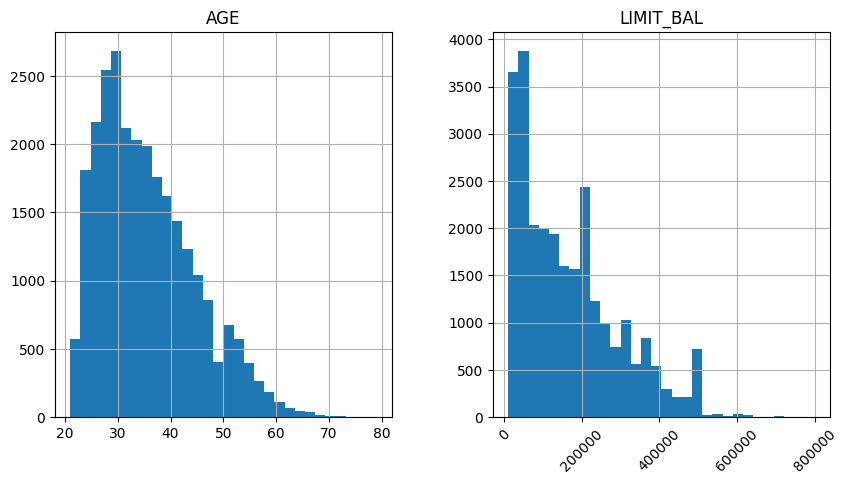

In [33]:
# Gerar o histograma para as colunas AGE e LIMIT_BAL
df3[['AGE', 'LIMIT_BAL']].hist(bins=30, figsize=(10, 5))

# Ajustar a rotação dos labels do eixo X para evitar sobreposição
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

In [34]:
# Fazendo análise descritiva para as colunas AGE e LIMIT_BAL
df3[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


In [35]:
df3['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

1. Aqui, vemos graus de instrução não documentados como 0, 5 e 6. 
2. Já que eles não são predominantes, vamos agrupa-los na categorias outros (4).

In [36]:
df3['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df3['EDUCATION'].value_counts()

/tmp/ipykernel_2611/3801694137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)


EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [37]:
df3['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

1. Aqui, vemos o valor 0, que não está documentado. 
2. Já que eles não são predominantes, vamos agrupa-los na categorias outros (3).

In [38]:
df3['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)
df3['MARRIAGE'].value_counts()

/tmp/ipykernel_2611/1269964405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)


MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

1. Os algoritmos de ML só funcionam com números.
2. Se os dados tiverem variáveis categóricas, devemos transformá-las em numéricas.
3. Especificamente a coluna EDUCATION era categórica, mas alguém a transformou em numérica para nós.
4. Esssa atribuição específica de categorias a números criou o que é conhecido como características ordinal, já que os níveis são mapeados para números em ordem. 
   * Quais são as implicações desse mapeamento?
   1. Faz sentido que os graus de instrução sejam categorizados, com 1 correspondendo ao mais alto grau de nosso dataset e assim ir descendo.
   2. No entanto, quando usamos essa codificação no modelo de ML, ela será tratada como qualquer outra característica numérica. Para alguns modelos esse feito pode não ser o desejado.
   * E se a função de um modelo for encontrar um relacionamento linear entre as características e a resposta?
   1. Se um algoritmo assumir um relacionamento linear entre as características e a resposta, isso pode ou não funcionar bem dependendo do relacionamento real entre essa característica e a variável resposta.
   2. No modelo de crédito estamos modelando um problema de regressão (variável resposta adota um intervalo de números contínuos). 
   3. Entretanto, alguns algoritmos de classificação como a regressão logística também assumem um efeito linear das caracterísitcas. 
   4. Assim, de um modo geral para um modelo de classificação binária, você pode examinar os diferentes níveis de características categóricas em relação aos valores médios da variável resposta, os quais representam as taxas da classe positiva para cada nível. 

Text(0.5, 0, 'Education level: ordinal encoding')

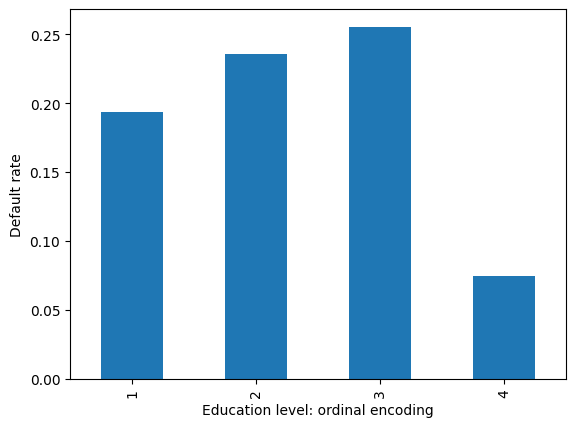

In [39]:
df3.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

1. Parece que um ajuste de linha resta não seria a melhor descrição dos dados. 
2. Assim, caso uma característica tenha um efeito não linear como esse, pode ser melhor usar um algoritmo mais complexo como uma árvore de decisão ou uma floresta aleatória. 
3. Ou, se um modelo linear mais simples e interpretável como a regressão logística for desejado, poderíamos evitar uma codificação ordinal e usar uma maneira diferente de codificar variáveis categóricas.
4. Uma maneira popular de se fazer isso é a OHE (codificação one-hot). 
5. A OHE é uma maneira de transformarmos uma característica categórica, que pode ser compsota de rótulos de texto nos dados brutos, em uma característica numérica que pode ser usado em modelos matemáticos. 

Observação: Alguns pacotes de ML, manipulam variáveis categóricas sem assumir que elas sejam ordinais. Certifique-se sempre de ler cuidadosamente a documentação para saber o que o modelo assumirá sobre as características, e como especificar se uma variável é categórica, se essa opção estiver disponível. 

In [40]:
## Implementando a OHE para característica categórica
# Criando uma nova coluna vazia para receber os dados categóricos
df3['EDUCATION_CAT'] = ''

In [41]:
# Exibindo as dez primeiras linhas
df3[['EDUCATION_CAT', 'EDUCATION']].head(10)

,EDUCATION_CAT,EDUCATION
0,,2
1,,2
2,,2
3,,2
4,,2
5,,1
6,,1
7,,2
8,,3
9,,3


In [42]:
# Criando um dicionário de mapeamento
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [43]:
# Aplicando o mapeamento
df3['EDUCATION_CAT'] = df3['EDUCATION'].map(cat_mapping)
df3[['EDUCATION_CAT', 'EDUCATION']].head(10)

,EDUCATION_CAT,EDUCATION
0,university,2
1,university,2
2,university,2
3,university,2
4,university,2
5,graduate school,1
6,graduate school,1
7,university,2
8,high school,3
9,high school,3


In [44]:
# codificação one-hot da coluna education_cat
edu_ohe = pd.get_dummies(df3['EDUCATION_CAT']).astype(int)
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [45]:
# concatenando o DataFrame de codificação one-hot com o original
df4 = pd.concat([df3, edu_ohe], axis=1)
df4[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


1. Perceba que aqui, pegamos uma única coluna e a explodimos em número de colunas igual aos dos níveis da característica.
2. Isso pode ser um problema se a variável categórica tiver muitos níveis. Neste caso, deve-se considerar uma estratégia alternativa, como agrupar alguns níveis em categorias individuais.

In [46]:
# Explorando as caracteristicas de histórico financeiro
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df4[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


1. O valor 9, descrito no dicionário de dados como "atraso de nove meses ou mais no pagamento" não ocorre. 

In [47]:
df4[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

In [48]:
pay_1_bins = np.array(range(-2, 10)) - 0.5

Text(0, 0.5, 'NUmber of accounts')

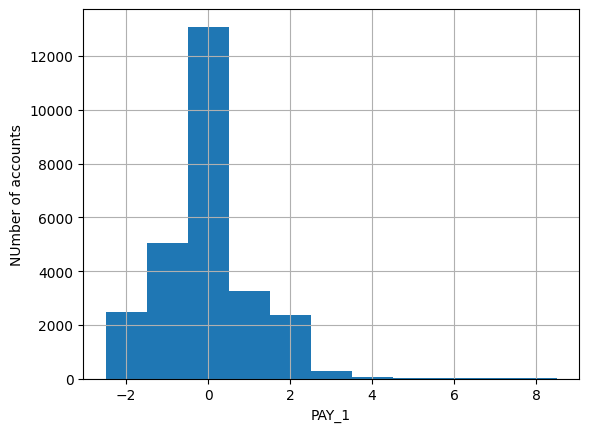

In [49]:
df4[pay_feats[0]].hist(bins=pay_1_bins)

# Ajustar a rotação dos labels do eixo X para evitar sobreposição
plt.xlabel('PAY_1')

# Mostrar o gráfico
plt.ylabel('NUmber of accounts')

1. Pela análise, a maioria das contas estava em boa situação no mês passado (-2, -1, 0). Para as contas que não estão, é mais comum que o atraso em meses tenha um número menor. Isso faz sentido; provavelmente, a maioria das pessoas está apgando sua dívida sem demorar muito. Caso contrário, sua conta pode ser fechada ou passada para uma agência de cobrança. 
2. Examinar a distribuição das características e verificar se ela parece razoável é algo bom para se confirmar com o cliente, já que a qualidade desses dados formará a base da modelagem preditiva.
3. Devido a definição dos outros valores dessa variável (1 até 8), essa característica é como um híbrido de características categóricas e numéricas. Por que a Não utilização do crédito deve corresponder a m valor igual a -2, enquanto o valor 2 significa atraso de 2 meses, etc?
   * Precisamos entender que a codificação numérica de status de pagamento, constitui uma decisão tomada pelo criador do dataset.
   * Posteriormente, consideramos os possíveis efeitos dessa froma de fazer as coisas sobre a capacidade preditiva dessa característica.
- Por enquanto, continuaremos explorando os dados, pois esse dataset é pequeno - com 18 características. Se ele tivesse milhares de características, provavelmente, exploraríamos técnicas de redução de dimensionalidade, que são maneiras de condensar as informações de um grande número de características em um número menor de características derivadas, ou, alternativamente, métodos de seleção de carcaterísticas, que podem ser usados para isolar as características importantes a partir de um grupo com várias canditadas. 

* Sobre o histograma:
  1. Ele funciona agrupando valores que chamamos de bins.
  2. O número de bins é o número de barras verticais que compõem a plotagem discreta do histograma que vemos. 
  3. Se houver uma grande quantidade de valores exclusivos em uma escala contínua, como no histograma de faixas etárias, a plotagem do histograma funcionará relativamente bem, com os argumentos padrões. 
  4. Entretanto, quando o número de valores exclusivos é igual ao númerod e bins, os resultados podem ser duvidosos. 
  5. O número padrão é 10, enquanto na variável PAY_1, há 11 valores distintos. Assim, devemos definir manualmente o número de bins.
  6. Alternativamente, você pode fornecer uma lista ou um array de números para o argumento de palavra-chave bins. Essa entrada seria interpretada como os locais das bordas dos bins no eixo x. 
  7. Uma das funções como DS é criar visualizações de dados precisas e representativas. Para isso, às vezes é necessário manipular os detalhes do código de plotagem.

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

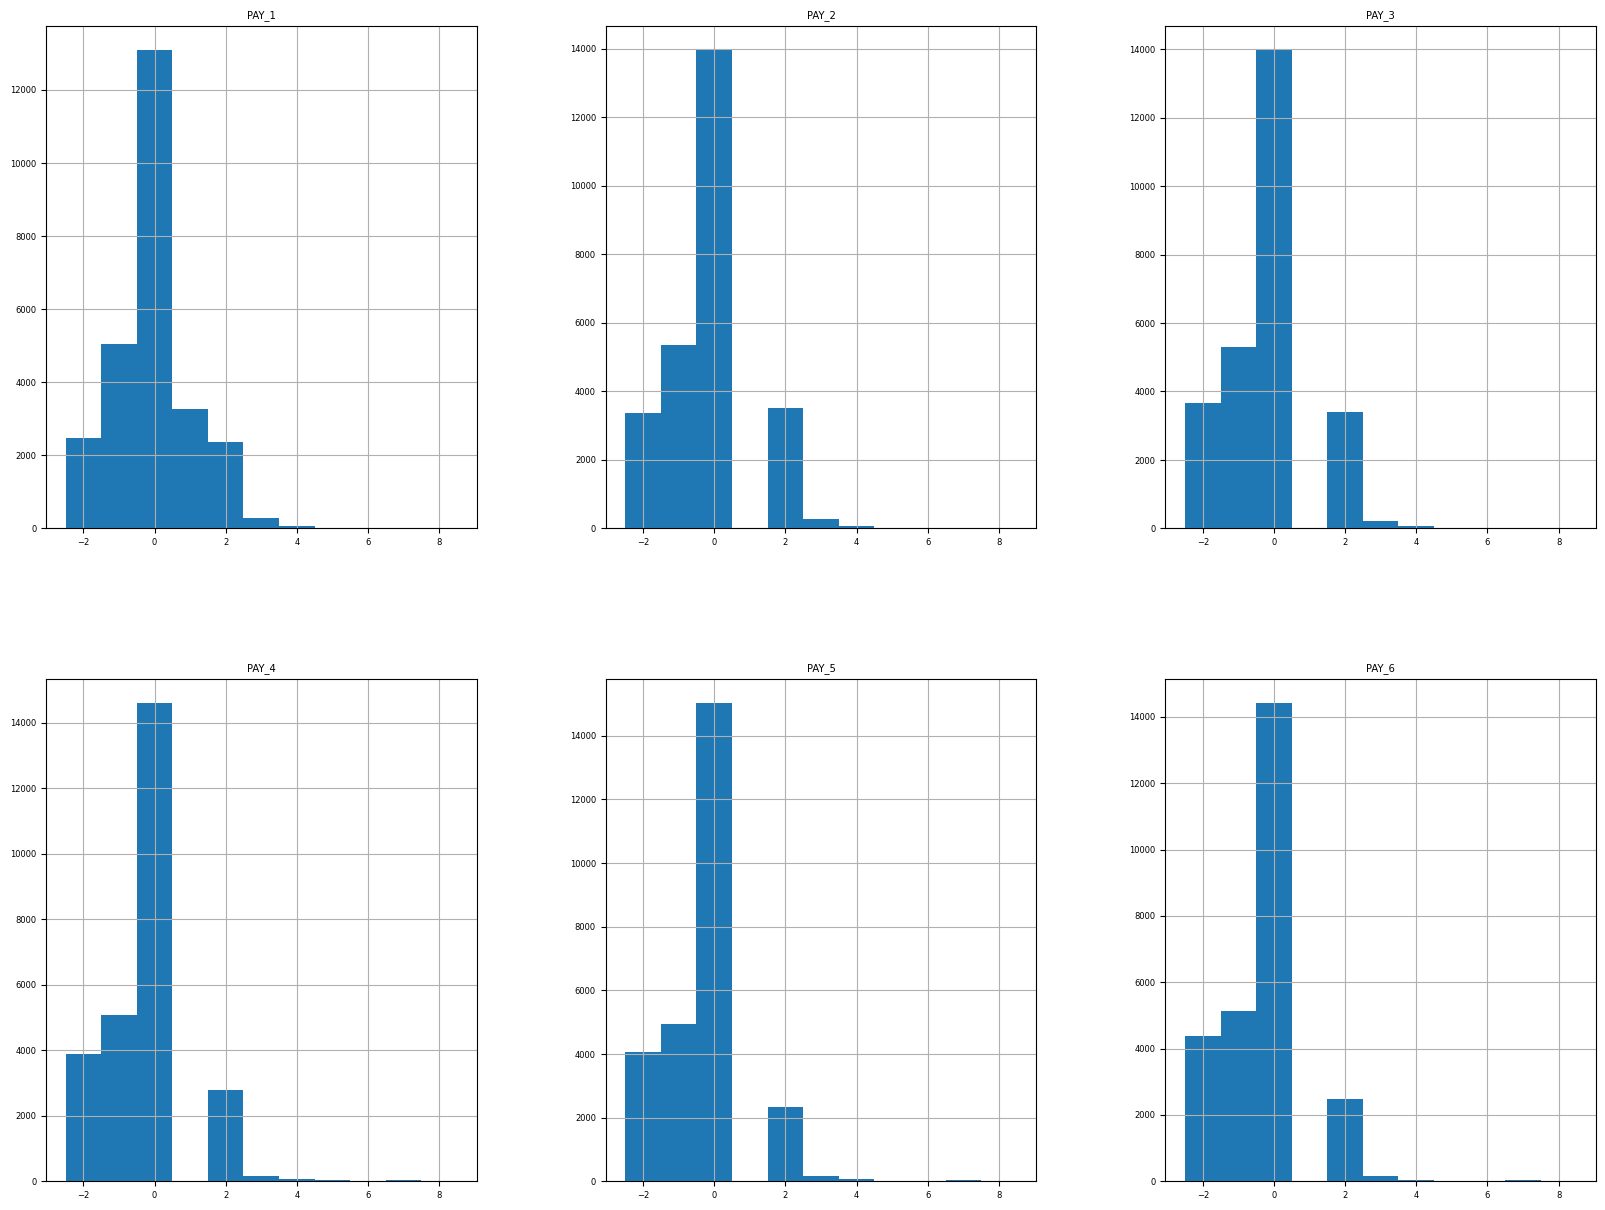

In [50]:
mpl.rcParams['font.size'] = 6
df4[pay_feats].hist(bins=pay_1_bins, layout=(2,3), figsize=(20,15))

1. Em julho poucas contas tiveram atraso de 1 mês. No entanto, em agosto, repentinamente há milhares de contas com atraso de 2 meses no pagamento. 
2. Isso não faz sentido. O número de contas com atraso de 2 meses em um mês específico deveria ser menor ou igual ao número de contas com atraso de 1 mês no mês anterior. 

In [51]:
df4.loc[df4['PAY_2']== 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


1. Fica claro que as contas com atraso de 2 meses em agosto, possui valores absurdos para o status de pagamento de julho.
2. A única maneira de chegarmos a um atraso de 2 meses seria haver um atraso de um mês no mês anterior, mas nenhuma dessas contas indica isso. 
3. Quando isso acontecer, você terá de verificar a lógica da consulta usada para criar o dataset ou entrar em contato com a pessoa que o forneceu. 
4. O cliente informou que está tendo problemas para obter dados do último mês, o que tem gerado relatórios incorretos para contas que têm atraso de 1 mês no pagamento.
5. Em setembro, ele resolveu grande parte dos problemas. Logo, em nosso dataset o valor 1 foi subnotificado em todos os meses exceto setembro (PAY_1)
6. Portanto, só o mês mais recente de nossos dados de status de pagamento está correto. Ou seja, so PAY_1 é representativa de dados futuros, aqueles que serão usados para fazermos previsões com o modelo que desenvolvemos. 
7. Um modelo preditivo depende da obtenção do mesmo tipo de dado para fazer as previsões para as quais foi treinado. 
8. Esse episódio mostra, a importância de uma verificação abrangente da qualidade dos dados. 

In [52]:
# Explorando as caracteristicas financeiras restantes do dataset
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [53]:
df4[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


1. Podemos ver que a cobrança média mensal é de aproximadamente 40k a 50k.
2. O que dá entre 1.300 a 1.500 dolares americanos por mês.
3. Há alguns valores de faturas negativos. Isso parece correto devido a um possível pagamento a mais da fatura do mês anterior, talvez como antecipação de uma compra que apareceria na fatura do mês atual.

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

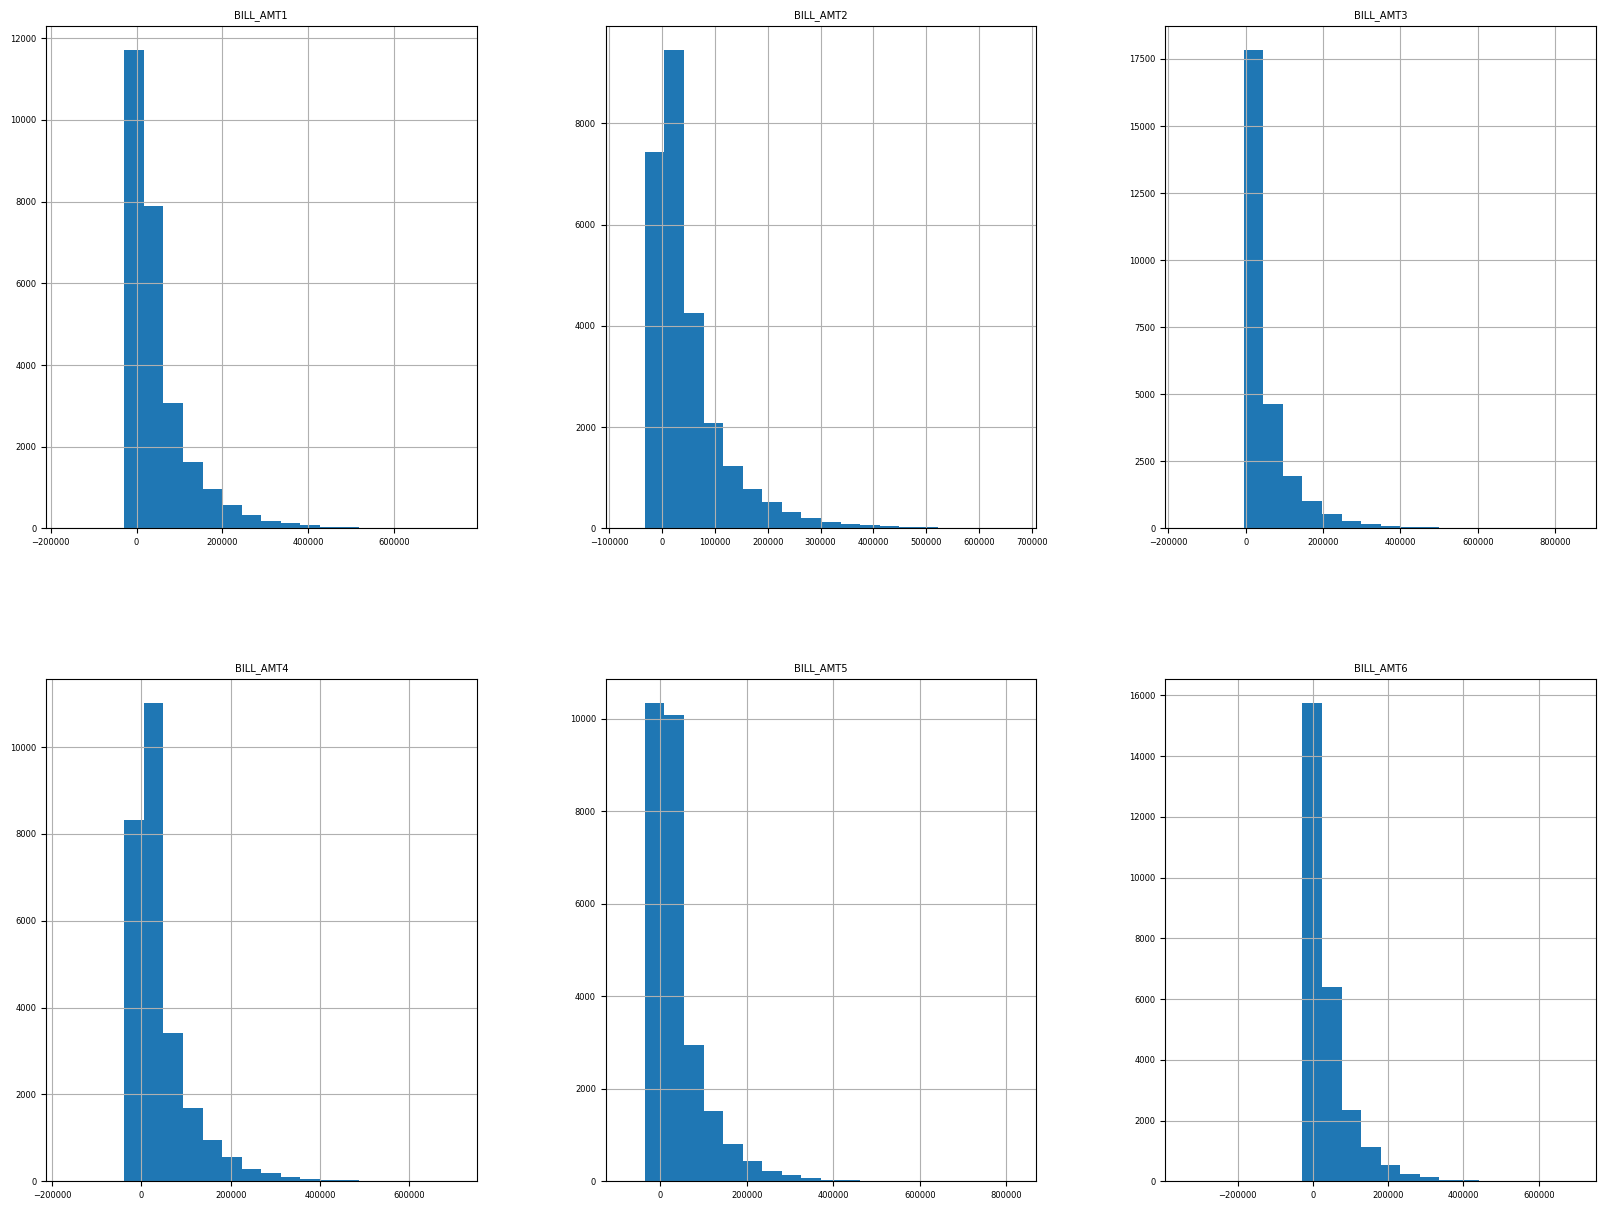

In [54]:
df4[bill_feats].hist(bins=20, layout=(2,3), figsize=(20,15))

1. As plotagens de histogramas fazem sentido. 
2. A maioria das contas tem faturas relativamente baixas.
3. Há uma diminuição estável no número de contas à medida que o valor da fatura aumenta.
4. Também indica que a distribuição de pagamentos é mais ou menos semelhante de um mês para o outro.

In [55]:
df4[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


1. Os valores de pagamento médios têm uma ordem de magnitudee (potência de 10) menor que os valores de fatura médios. 
2. Isso significa que o "caso médio" é uma conta que não está liquidando seu saldo total de um mês para o outro.
3. Isso faz sentido, de acordo com nossa exploração da característica PAY_1, para o qual o valor predominante era 0 (a conta fez o pagamento mínimo, mas não liquidou o saldo total). 
4. Não há pagamentos negativos, o que também parece correto.

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

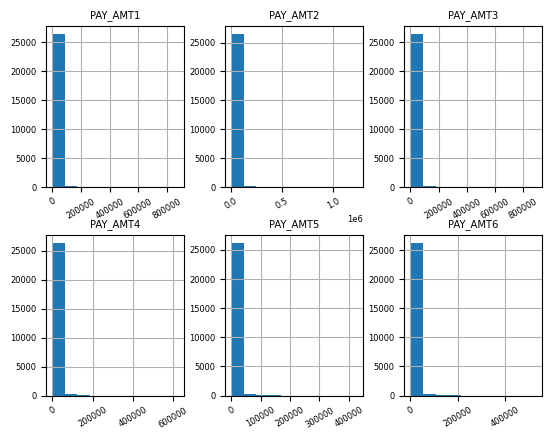

In [56]:
df4[pay_amt_feats].hist(bins=10, layout=(2,3), xrot=30)

1. Montamos uma estratégia para visualizar melhor os dados acima.
2. Mascaramos os pagamentos iguais a zero, pois log10(0) é indefinido.

In [57]:
pay_zero_mask = df4[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [58]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

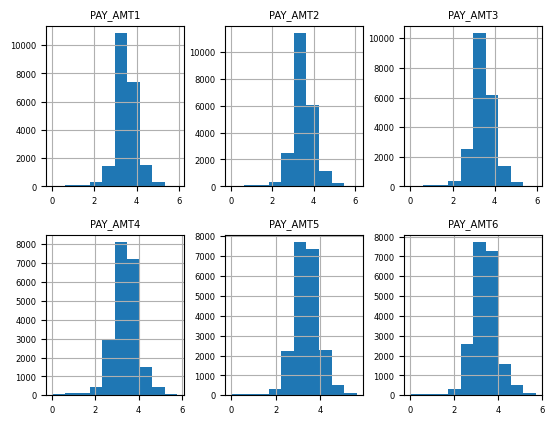

In [59]:
df4[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

1. Os pagamentos que mais ocorrem estão no intervalo dos milhares (3), o que coincide com o que observamos para o pagamento médio na síntese estatística.
2. Há alguns pagamentos muito baixos, e também alguns muito altos.
3. No geral, a distribuição de pagamentos parece bem consistente de um mês para o outro.

## 3.1 - Examinando os relacionamentos das características e a resposta

In [60]:
features_response = df4.columns.tolist()
features_response[::]

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [61]:
items_to_remove = ['ID', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

* As colunas acima foram removidas pois: 
  1. PAY está incorreta como vimos acima.
  2. Education_Cat e correlatas já estão incluídas na EDUCATION. 
  3. ID é só identificador não possui ligação com variável resposta.

In [62]:
# list comprehesion
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

* A list comprehesion permite a criação de listas que seriam distribuidas em várias linhas de um loop for real, seja escrita em uma única linha.
* Elas são um pouco mais rápidas que os loops for, devido às otimizações que ocorrem em Python. 

<Axes: >

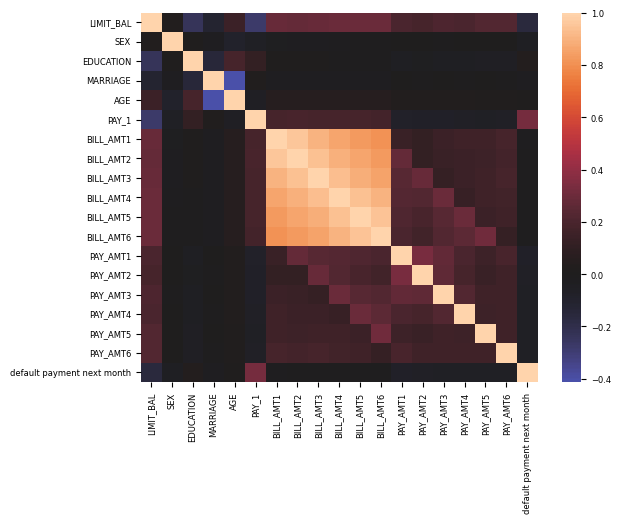

In [63]:
corr = df4[features_response].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

* No Pandas a correlação linear/Pearson, é usada para medir a força e a direção (isto é, positiva ou negativa) do relacionamento linear entre duas variáveis.
  1. Já que a correlação de Pearson é ajustada para a média e o desvio padrão dos dados, os valores reais não são tão importantes quanto o relacionamento entre X e Y. As correlações lineares mais fortes ficam próximas de 1 ou -1. Se não houver relação linear entre X e Y, a correlação ficará próxima de 0.
* Se duas características ou uma característica e a variável resposta, estiverem altamente correlacionadas (1), podemos dizer que há uma forte associação entre elas. E assim, elas serão úteis na previsão.
* A característica PAY_1 é a que mais se relaciona com a variável resposta. 
* A LIMIT_BAL possui correlação negativa. 

Obs.: A correlação de Pearson não é muito apropriada para uma variável de resposta binária. Tecnicamente falando, ela só é válida para  dados contínuos. No entanto, ela pode ajudar a dar uma visão geral da utilidade das características. 

1. A correlação linear não é uma medida eficiente para o poder preditivo de todas as características. Ela só funciona em relacionamentos lineares. 
2. Em geral, é uma boa ideia examinar visualmente o relacionamento entre as características e a resposta em uma Matriz de Gráfico de Dispersão, pois as variáveis podem se relacionar de maneira não linear. 

## 3.2 - Seleção de características univariada
* Prática de testas as características uma a uma em relação à variável respota para ver quais têm poder preditivo. 

* TEST F ANOVA (f_classif):
  1. Para dados binários que assumem carcaterística de dados categóricos. 
  2. É uma análise da variância e pode ser comparado com o teste F de regressão (f_regression) (semelhante a correlação de Pearson)
  3. No contexto do teste F, o "valor-p" responde a seguinte pergunta: "Qual a probabilidade de o valor da média dessa característica nas amostras da classe positiva ser igual ao de amostras na classe negativa?"
   3.1. Se uma característica tiver valores de media muito diferentes entre as classes:
        - É improvável que os valores da média sejam iguais (valor-p baixo)
        - Provavelmente será uma boa característica em nosso modelo porque nos ajudará a distinguir as classes positivas das negativas.
  4. Quando fizemos um teste F para analisar somente entre dois grupos, na verdade o teste se resume ao teste t. Um teste F é extensível a três ou mais grupos e, portanto, útil para a classificação multiclasse. 
  5. Cuidados:
        - No teste F, pressupõe-se que os dadaos estão normalmente distribuídos.
        - Comparações múltiplas: significa que, examinando várias características e comparando-as repetidamente com a mesma resposta, aumentam as chances de encontrarmos aleatoriamente uma boa característica. Porém, talvez essas características não possam ser generalizadas para novos dados. As correções estatísticas para comparações múltiplas ajustam os valores-p para resolver esse problema. 
        - Muitos métodos que assumem uma distribuição normal são usados regularmente com dados não normais, com frequencia com resultados aceitáveis. E a correção da comparação múltipla é uma preocupação maior quando os valores-p são os que mais interessam, por exemplo, ao fazermos inferências estatísticas.  

* Desvantagens:
  1. Ela não considera as interações entre as características. Por exemplo: se a taxa de não pagamento de dívidas for muito alto para pessoas com determinado grau de educação e para um intervalo de limite de crédito específico?
  2. Os métodos usados aqui, só os efeitos lineares das características são capturados. Se uma característica for mais preditiva ao passar por algum tipo de transformação, como a polinomial, logarítimica ou binning (discretização), as técnicas lineares da seleção de características univariadas podem não ser eficazes. As interações e transformações são exmplos de ENGENHARIA DE CARCATERÍSTICAS. As deficiências dos métodos de seleção de características linear podem ser remediadas pelas técnicas de modelagem não lineares que incluem a RANDOM FOREST. 
  3. Mesmo assim, é importante e rápido, procurar os relacionamentos simples que podem ser encontrados pelos métodos lineares da seleção de características univariada. 

In [64]:
# Seleção de características univariada
X = df4[features_response].iloc[:,:-1].values
y = df4[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 18) (26664,)


In [65]:
(f_stat, f_p_value) = f_classif(X, y)

In [66]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1], 'F statistic': f_stat, 'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
12,PAY_AMT1,140.612679,2.358354e-32
13,PAY_AMT2,101.408321,8.256124e-24
14,PAY_AMT3,90.023873,2.542641e-21
16,PAY_AMT5,85.843295,2.090120e-20
17,PAY_AMT6,80.420784,3.219565e-19
15,PAY_AMT4,79.640021,4.774112e-19
1,SEX,42.610039,6.801534e-11
2,EDUCATION,32.637768,1.122175e-08


1. PAY_1 e LIMIT_BAL parecem ser características mais úteis, pois possuem valores-p menores, o que indica que os valores da média dessas características entre a classe positiva e negativa são signficiativamente diferentes, e ajudar'~ao a prever a que classe uma amostra pertence. 

In [67]:
# Selecionando as 20% melhores features
selector = SelectPercentile(f_classif, percentile=20)

# Ajustando o objeto às características e aos dados da resposta
selector.fit(X, y)

# Pegando os nomes das características
best_feature = selector.get_support()
best_feature

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [68]:
features = features_response[:-1] # nome de todas características exceto o último (variável resposta)
best_feature = [features[counter] for counter in range(len(features))
                if best_feature[counter]]
best_feature

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

### 3.2.1 - Examinando as best_features

1. PAY_1 --> Essa característica captura valores históricos da variável resposta. Característica como essa são um dos melhores preditores para qualquer problema de ML que use dados históricos para a mesma coisa que estamos tentando prever. Ou seja, as pessoas que já ficaram inadimplentes apresentam maior risco de inadimplir novamente. 
2. LIMIT_BAL --> clientes que apresentam mais risco devem recebem limites mais baixos para que o credor tenha menos problemas. Logo, podemos esperar uma maior probabilidade de inadimplência para contas com valores menores para LIMIT_BAL.

In [69]:
# Visualizando o relacionamento entre as características e a resposta
overall_default_rate = df4['default payment next month'].mean() # calculando a linha se base da variável respota para a taxa de inadimplência
overall_default_rate

np.float64(0.2217971797179718)

In [70]:
# Taxas de inadimplência para diferentes valores de PAY_1
group_bt_pay_mean_y = df4.groupby('PAY_1').agg({'default payment next month': np.mean})
group_bt_pay_mean_y 

/tmp/ipykernel_2611/3525821609.py:2: FutureWarning: The provided callable <function mean at 0x7f7f8418bce0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_bt_pay_mean_y = df4.groupby('PAY_1').agg({'default payment next month': np.mean})


,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


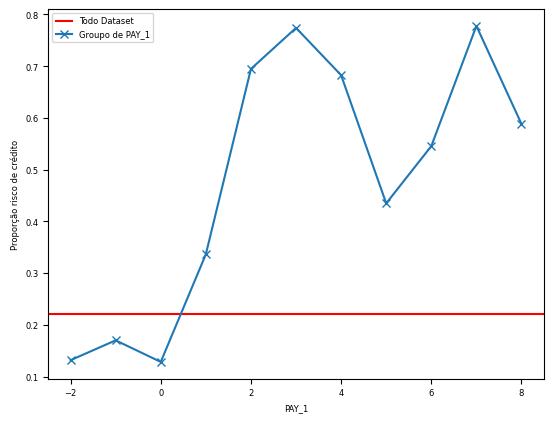

In [71]:
# plotando o gráfico
axes = plt.axes()
# plotando a taxa de inadimplência geral (linha vermelha)
axes.axhline(overall_default_rate, color='red')
# taxa de inadimplência PAY_1
group_bt_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporção risco de crédito')
axes.legend(['Todo Dataset', 'Groupo de PAY_1'])

1. Confirma a tese de quem já inadimpliu tem tendência a inadimplir novamente.
2. Pelo menos 30% das contas que estavam inadimplentes no último mês estarão inadimplentes novamente no próximo mês. 

* Uma boa maneira de visualizar característica numérica com muitos valores exclusivos, é plotar vários histogramas no mesmo eixo com diferentes cores para classes distintas.

Text(0.5, 1.0, 'Credit limits by response variable')

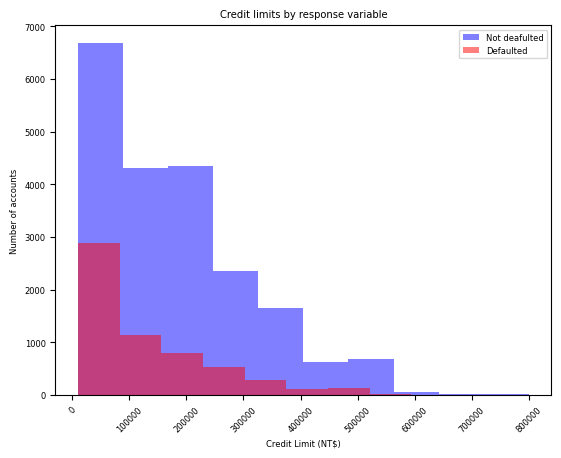

In [72]:
# Criando máscras lógicas para amostras positivas e negativas
pos_mask = y==1
neg_mask = y==0
# 
axes = plt.axes()
axes.hist(df4.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df4.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not deafulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

1. Há menos contas inadimplentes, pois há menos fraçoes nesta classe. 
2. Seria mais informativo um gráfico sobre a diferença da forma desses histogramas
    - Vamos normalizar os histogramas. 
    - Matplotlib fornece um argumento de palavra-chave que facilita a criçào de uma FUNÇÃO DE DENSIDADE DE PROBABILIDADE. Isso significa que a integral, ou a área contida dentro de cada histograma, será igual a 1 após a normalização, já que as probabilidades resultam em 1. 

In [73]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


/tmp/ipykernel_2611/2701241999.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

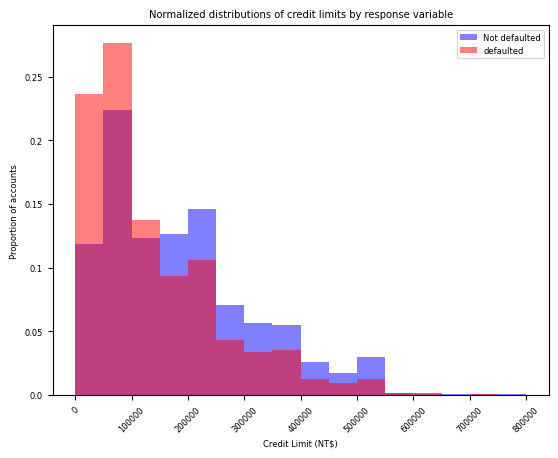

In [74]:
axes = plt.axes()
axes.hist(df4.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df4.loc[pos_mask,'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit Limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(['Not defaulted', 'defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

1. Contas com limites de crédito menores do que 150.000 estão relativamente mais propensas a inadimplir.
2. No final do modelo, se essa característica for importante para a modelagem preditiva, seria bom exibir esses gráficos para o cliente.
3. Apresentações visuais convincentes valem o esforço, já que comunicam descobertas importantes de maneira rápida e eficiente para o cliente.

# 4.0 - Balanceamento dos Dados

1. Para este problema de negócio, queremos encontrar se uma conta ficará ou não inadimplente no próximo mês, que, neste dataset seria Outubro.
2. A variável resposta será binária 1 indicando que ficará inadimplente e 0 que ficará adimplente.

In [75]:
df5 = df4.copy()

In [76]:
# Calculando a proporção da classe positiva no datset - Inadimplentes
df5['default payment next month'].mean()

np.float64(0.2217971797179718)

In [77]:
# Verificando o número de amostras em cada classe
df5.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

1. Essa amostragem dos dados é importante pois, na classificação binária, os datasets são descritos considerando se eles estão balanceados ou desbalanceados.
2. A maioria dos modelos de classificação em ML é projetada para operar com dados balanceados: uma divisão 50/50 entre as classes. 

* Há vários métodos que têm o objetivo de lidar com dados desbalanceados:
    1. Undersampling/Subamostragem da classe majoritária: eliminar aleatoriamente amostras da classe majoritária até as frações das classes serem iguais ou menos desbalanceadas.
    2. Sobreamostragem/Oversampling da classe minoritária: adicionar aleatoriamente amostras duplicadas da classe minoritária para atingir o mesmo objetivo.
    3. Ponderação de amostras/Weighting Samples: esse método é executado como parte da etapa de treinamento, para que a classe minoritária receba coletivamente a mesma ênfase da classe majoritária no modelo ajustado. O efeito é semelhante ao do oversampling. 
    4. Existem outros métodos mais sofisticados como: ...

1. Normalmente, algumas áreas, como a detecção de fraudes, lidam com frações de classes positivas muito menores: da ordem de 1% ou menos.
2. Para prbolemas como esse, usar um método para resolver o desbalanceamento de classes leva a resultados substancialmente melhores.

* A medida que criamos modelos e geramos novos resultados, é recomendável pensar no que estes resultados informam sobre os dados, o que em geral requer uma volta rápida 1a fase de exploração dos dados.

# 5.0 - Machine Learning

* OBSERVAÇÕES:
  1. Sempre que for usar um modelo de ML preparado de antemão como os modelos do scikit-learn, a primeira coisa a fazer é conhecer todas as opções de parâmetros que estão disponíveis.
  2. Uma boa prática recomendada nesses casos, é fornecer explicitamente cada parâmetro de palavra-chave para criar o objeto. Mesmo se slecionar todas as opções padrão, isso ajudará a ter uma noção melhor das decisões que estamos tomando.

1. Um hiperparâmetro é como uma opção que você fornece para o modelo antes de ajustá-lo aos dados.
2. Séries nada mais é do que colunas do dataframe

In [78]:
my_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
my_lr

LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

1. Nas próximas duas caixas de código, vamos selecionar duas séries do nosso DataFrame: a carcaterística Education que estamos discutindo, e a variável de resposta. 
2. Em seguida, selecionaremos os 10 primeiros elementos de cada uma e, para concluir, usaremos o método .values para retornar um array Numpy. 
3. Usaremos também o método .reshape para redimensionar as características. 
4. O scikit-learn espera que a primeira dimensão (número de linhas) do array de características, seja o n;umero de amostras, logo, precisaremos fazer esse redimensinamento para o X, mas não para o Y.
5. O -1 no primeiro argumento posicional de .reshape torna a forma do array de saída flexível nessa dimensão, de acordo com o número de dados que entrarem. 
6. Já que temos apenas uma carcaterística, especificamos o número de colunas como o segundo argumento,1, e deixamos que o argumento -1 indique que o array deve ser preenchido ao longo da primeira dimensão com quantos elementos forem necessários para acomodar os dados, nesse caso 10 elementos. 
7. Também poderiamos ter usado séries do pandas como entrada para o scikit-learn.

In [79]:
X = df5['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [80]:
y = df5['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
# usaremos os dados acima para ajustar a nossa RL - treinando o modelo
my_lr.fit(X, y)

/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [82]:
# Modelo treinado - vamos fazer a previsão para novas características que o modelo ainda não viu, usando as próximas 10 linhas da variável EDUCATION
new_X = df5['EDUCATION'][10:20].values.reshape(-1, 1)
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

1. Observe que o único argumento desse método é um conjunto de características, isto é, um X. 
2. Nesse caso, não foi fornecido um 'y'. Na verdade, é para isso que serve a modelagem preditiva: você não sabe necessariamente o valor verdadeiro da variável resposta, logo, tem de poder prevê-la.

In [83]:
# Comparando os valores preditos com os valores reais
df5['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

1. O modelo obteve 80% de acerto.
2. Por outro lado, não conseguimos prever com sucesso nenhum 1 (default).
3. Por isso, se é mais importante prever os defaults (1) o modelo não performou bem.
4. O que seria então uma "boa" previsão para este problema?

1. Teoricamente, a regressão linear só deve ser usada para modelar dados em que a resposta seja uma transformação linear das características, com ruído normalmente distribuído (também chamado de gaussiano).

## 5.1 - Treinamento e Teste

1. Reservaremos alguns dados que temos, com rótulos conhecidos - antes de treinar o modelo (dados teste). 
2. Com os dados restantes, treinaremos o modelo.
3. Separar um conjunto de teste nos dará uma ideia de como será o desempenho do modelo quando ele for usado durante seu treinamento.
4. Não há uma regra rígida para definirmos o tamanho dos dados de treinamento e teste. Vamos utilizar 80-20.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df5['EDUCATION'].values.reshape(-1,1), df5['default payment next month'].values, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


1. A definição do random state permite uma divisão dos dados consistente entre as execuções do notebook. Caso contrário, o procedimento de divisão aleatória selecionaria um percentual de 20% dos dados de tteste diferente a cada vez que o código fosse executado. 

In [115]:
# Saber se a natureza é a mesma entre os conjuntos. Se a classe positiva é semelhante
print(np.mean(y_train))
print(np.mean(y_test))

0.22333692747644274
0.2156384774048378


1. O conjunto de dados de treinamento é representativo do conjunto de dados de teste. Ambos com aproximadamente 22%

1. Para evitar cenários onde amostras no conjunto de teste seja muito discrepante ou inexistente, você pode usar uma AMOSTRAGEM ESTRATIFICADA, com o argumento de palavra chave stratify de train_test_split. 
2. Esse procedimento garante que as frações das classes sejam iguais ou muito semelhantes entre os dois conjuntos de dados.

* Test out-of-time:
  1. Se os dados contiverem tanto características quanto respostas estendendo-se por um período de tempo significativo, é recomendável tentar fazer a divisão treinamento/teste com o passar do tempo. Decotando os dados pelo tempo que for operacionalmente viável quando o modelo for usado.

In [116]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [117]:
# Avaliando a qualidade das previsões
metricas = classification_report(y_test, y_pred)
print(metricas) # metrics

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4183
           1       0.00      0.00      0.00      1150

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.62      0.78      0.69      5333



/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

1. Precisão = trata-se da proporção de previsões positivas que estão corretas
2. Recall = 

In [118]:
accuracy = y_pred == y_test # mede a proporção de amostras que foram classificadas corretamente
np.mean(accuracy) 

# metrics.accuracy_score(y_test, y_pred) // ou
# example_lr.score(X_test, y_test) // ou


np.float64(0.7843615225951622)

1. Se trata de um modelo nulo, pois aproximadamente 22% das amostras são positivas no nosso dataset.
2. Logo, a classe negativa é majoritária, com 78%. 
3. Assim, a acurácia aqui não é muito útil.

* Matriz de Confusão:
  1. Taxa de verdadeiros positivos (TPR)
  2. Taxa de falsos negativos (FNR) -> proporção de amostras de teste positivas previstas incorretamente como negativas
  3. Taxa de verdadeiros negativos
  4. Taxa de de falsos positivos -> proporção de amostras de teste negativas previstas incorretamente como positivas

Obs.: Como queremos fazer classificações corretas, queremos que a diagonal esquerda-direita seja maior.

In [89]:
# metrics.confusion_matrix(y_test, y_pred)

P = sum(y_test)
TP = sum((y_test==1) & (y_pred==1))
TPR = TP/P
print(TPR)

FN = sum((y_test==1) & (y_pred==0))
FNR = FN/P
print(FNR)


0.0
1.0


In [90]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
TNR = TN/N
print(TNR)

FP = sum((y_test==0) & (y_pred==1))
FPR = FP/N
print(FPR)

1.0
0.0


* O modelo agiu como modelo nulo de classe majoritáira. Todas as amostras positivas foram previstas como negativas, logo, nenhuma delas foi prevista corretamente.

1. Outro tipo importante de classificação de ML é a classificação multiclasse. 
2. Nela, há vários resultados mutuamente exclusivos possíveis. 
3. As métricas serão as mesmas. 

## 5.2 - Funcionamento da Regressão Logistica

* As saídas diretas da equação matemática que define a RL não são rótulos binários, mas probabilidade de ser 0 e 1. 
* Essas probabilidades são transformadas em previsões binários com o uso de um limite (threshold - padrão 0.5). 
* O limite é a prabilidade acima da qual uma previsão é declarada como positiva e abaixo da qual ela é negativa.
* Podemos acessar diretamente as probabilidades previstas dessas amostras, utilizando o método .predict_proba

* Por que a regressão logística é considerada um modelo linear? 
  1. Um modelo é considerado linear quando a transformação usada no cálculo da previsão é uma combinação linear das características. 
  2. As possibilidades de uma combinação linear ocorrem quando cada característica pode ser multiplicada por uma constante numérica, esses termos podem ser somados, e uma constante adicional também pode ser somada. 
Obs.: Embora transformações matemáticas complexas não façam parte da formulação básica de uma combinação linear, elas podem ser adicionadas a um modelo linear com a ENGENHARIA DE CARACTERÍSTICAS. 
  1. Aprendemos que as previsões da regressão logística, que assumem a forma de probabilidades, são feitas com o uso da função sigmóide. Essa função é claramente não linear.
  2. Mas, ao aplicar a função logit() inversa da sigmóide. A função logit também é chamada de logaritmo das chances (log-odds), porque é o logaritmo natural da razão de possibilidades (odss ratio)
  3. A regressão logistica é considerada um modelo linear porque as características incluidas em X na verdade só estão sujeitas a uma combinação linear quando a variável resposta á razão de possibilidades. É como se fizessemos o inverso da função sigmóide. 
  4. Se considerarmos essa forma de regressão logística, idealmente as características do modelo seriam lineares no logarítmo das chances da variável resposta. 
  5. A RL faz parte das GLMs. Os GLMs estão ligados ao conceito básico de regressão linear ordinária, que pode ter uma única característica (isto é, a linha de melhor ajuste, y = mx + b, para uma carcaterística individual, x) ou mais de uma na regressão linear múltipla. A conexão matemática entre os GLMs e a regressão linear é a função de ligação. A função de ligação da regressão logística é a função logit. 
   

* Chat, do ponto de vista teórico e matemático, por que a regressão logística é considerada um modelo linear?
* A **Regressão Logística** é considerada um modelo linear do ponto de vista teórico e matemático porque, apesar de sua saída ser uma probabilidade (valor não linear), o modelo se baseia em uma combinação linear dos parâmetros de entrada para fazer previsões. Vamos explicar isso em detalhes:

### 1. **Modelo Linear na Regressão Logística**
   
A fórmula básica para a Regressão Logística é a seguinte:

\[
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
\]

- \(P(y=1|X)\) é a probabilidade da classe ser 1 (a classe positiva) dado o vetor de características \(X = (X_1, X_2, \dots, X_n)\).
- \(\beta_0\) é o intercepto (ou termo de bias).
- \(\beta_1, \beta_2, \dots, \beta_n\) são os coeficientes associados a cada uma das características \(X_1, X_2, \dots, X_n\).

A **parte linear** do modelo está dentro da função exponencial (o termo \(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n\)):

\[
z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
\]

Esse termo \(z\) é uma **combinação linear** das variáveis de entrada \(X\), o que caracteriza o modelo como linear.

### 2. **Transformação Não Linear: Função Sigmoide**

O valor de \(z\), que é linear, é passado por uma função sigmoide (logística), que mapeia \(z\) para o intervalo entre 0 e 1, produzindo uma probabilidade:

\[
P(y=1|X) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_n X_n)}}
\]

Essa transformação sigmoide é o que torna a regressão logística útil para **classificação binária** (prever 0 ou 1), mas não afeta o fato de que a relação entre os coeficientes \(\beta\) e as características \(X\) é linear.

### 3. **Função Logit (Função Inversa da Sigmoide)**

Podemos entender ainda melhor porque a regressão logística é um modelo linear quando consideramos a **função logit**, que é a inversa da função sigmoide. A função logit é a seguinte:

\[
\text{logit}(P) = \log\left(\frac{P}{1 - P}\right)
\]

Se aplicarmos a função logit na probabilidade \(P(y=1|X)\), obtemos:

\[
\log\left(\frac{P(y=1|X)}{1 - P(y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \dots + \beta_n X_n
\]

Ou seja, a **log-odds** (logaritmo da razão de chances) é uma função linear das variáveis de entrada. Isso reforça o fato de que a relação entre as características \(X\) e a previsão \(y\) é linear em termos da log-odds.

### 4. **Resumindo por que é Linear**

- A **regressão logística** usa uma **combinação linear** das variáveis de entrada \(X\) e dos coeficientes \(\beta\) para fazer a previsão.
- A função sigmoide (logística) **transforma essa combinação linear** para produzir uma probabilidade entre 0 e 1, mas isso não muda o fato de que a base do modelo é linear.
- A **log-odds** (logaritmo da razão de chances) é uma **função linear** das variáveis de entrada, o que define a natureza linear da regressão logística.

Portanto, do ponto de vista matemático, a **regressão logística é um modelo linear** porque as previsões são baseadas em uma combinação linear das variáveis explicativas, mesmo que a saída final (a probabilidade) passe por uma transformação não linear.

In [91]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

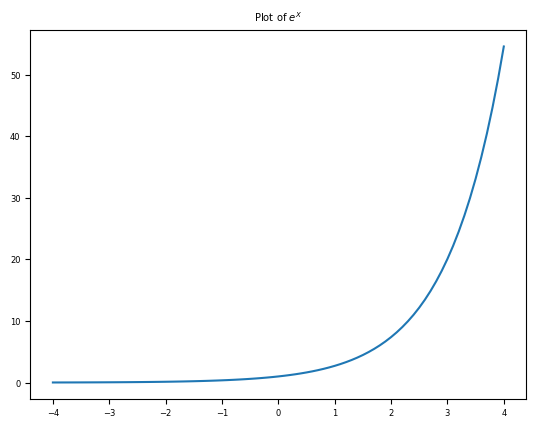

In [92]:
# Função exponencial
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')
Y_exp[:5]

1. A função exponencial nunca é negativa: à medida que o X se aproxima do infinito negativo, Y se aproxima de 0.
2. À medida que X aumenta, no inicio Y aumenta lentamente, mas com muita rapidez, explode. Isso que chamamos de crescimento exponencial.

Text(0.5, 1.0, 'Plot of $e^{-X}$')

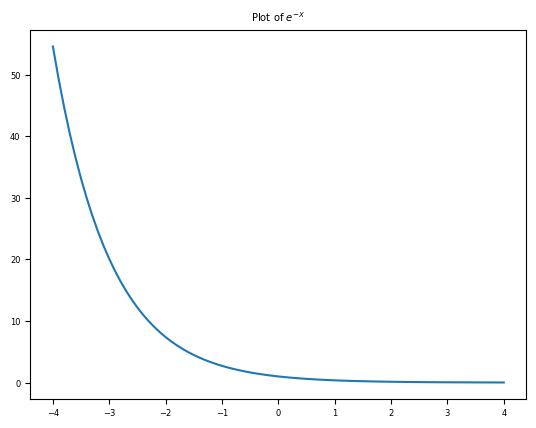

In [93]:
# Plotando a função logarítima/sigmóide
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')


1. À medida que X se aproxima do infinito negativo, Y explode, tornando-se muito alto.
2. À medida que X se aproxima do infinito positivo, Y diminui lentamente até se aproximar de 0.
   - Isso nos dá a impressão que a função fica entre 0 e 1.

In [94]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The Sigmoid function')

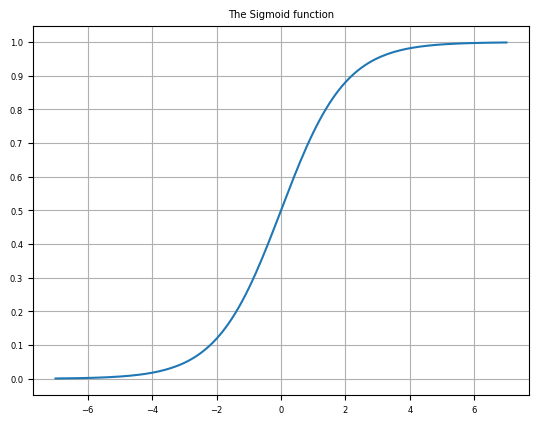

In [95]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The Sigmoid function')

* A função sigmóide é boa para prever probabilidades que precisem ficar entre 0 e 1. 
* A regressão logística produz probabilidades previstas de associação de classe em vez de prever diretamente a associação. A função sigmóide é a fonte dessas probabilidades previstas. 

* Escopo das funções
1. Variáveis criadas dentro da função são diferentes das criadas fora. Escopo local.
2. Variáveis globais podem ser acessadas dentro do escopo da função. O contrário não é verdadeiro.
* As funções, isolam as operações que estão sendo executadas. 
* Para regressão logística, a função sigmóide/logística é importante. exp() --> Numpy (é um função vetorizada)

In [96]:
# Avaliando PAY_1 na regressão logística
p = group_bt_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [97]:
odds_ratio = p/q
log_odds_ratio = np.log(odds_ratio)
print(odds_ratio)
print(log_odds_ratio)

[0.15162791 0.20482215 0.14717742 0.50693161 2.27548209 3.42424242
 2.15       0.76923077 1.2        3.5        1.42857143]
[-1.88632574 -1.58561322 -1.91611649 -0.67937918  0.82219194  1.23088026
  0.76546784 -0.26236426  0.18232156  1.25276297  0.35667494]


Text(0.5, 0, 'Values of PAY_1')

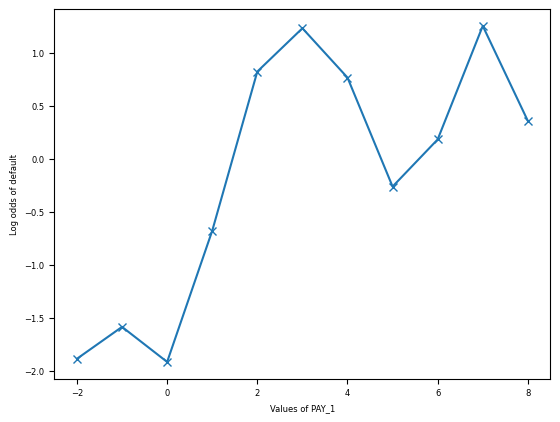

In [98]:
plt.plot(group_bt_pay_mean_y.index, log_odds_ratio, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

1. O relacionamento entre o logaritmo das chances da variável resposta e a característica PAY_1 não é tão diferente do relacionamento entre a taxa de inadimplência e essa característica.
2. Logo, se a taxa de inadimplência for um conceito mais simples para você comunicar para o CEO, pode ser melhor usa-la. 
3. Essa plotagem mostra exatamente o que se supõe que seja linear. 

* O ajuste de linha reta é um bom modelo para esses dados?
  1. Parece que uma linha de melhor ajuste desenhada nessa plotagem subiria da esquerda para a direita. Ao mesmo tempo, os dados não dão a impressão de que resultariam de um processo realmente linear. 
  2. ...Continua mais a frente...

* Limite de decisão linear da regressão logística:
  1. Faremos um exercício com apenas duas carcaterísticas para fins de visualização, mas este modelo pode ser usado para múltiplas características

In [99]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


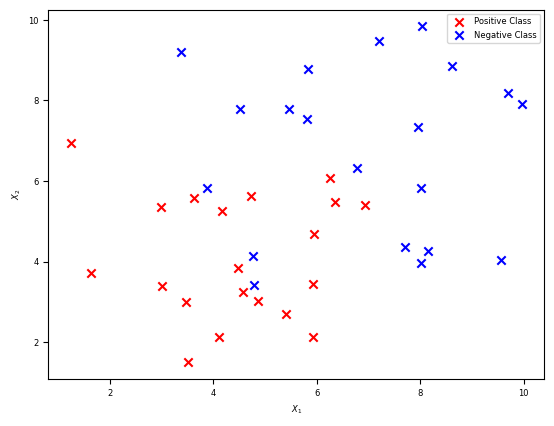

In [100]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive Class', 'Negative Class'])

In [101]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [102]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [103]:
exemplo_lr = LogisticRegression()
exemplo_lr.fit(X, y)
# obtendo previsões e separando-as as classes positivas e negativas
y_pred = exemplo_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 26, 32, 38]

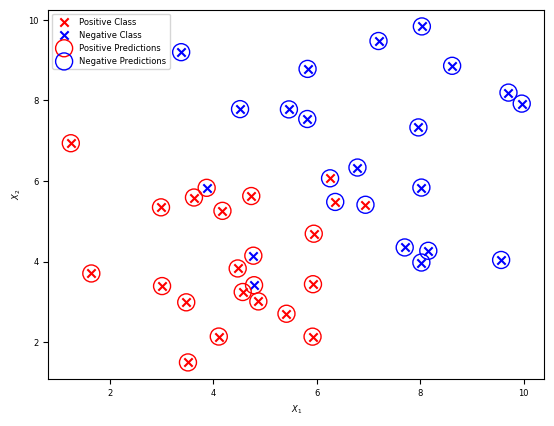

In [104]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices, 0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive Class', 'Negative Class', 'Positive Predictions', 'Negative Predictions'])

1. Já vemos que algumas amostras dos dados de treinamento foram classificadas incorretamente: as amostras positivas são as 20 primeiras, mas aqui há indices fora desse intervalo.
2. Assim, um limite de decisão linear não conseguiria classificar corretamente esses dados.
3. Pela plotagem, fica claro que o classificador tem problemas com os pontos de dados que estão perto de onde seria o limite de decisão linear, alguns deles podem acabar no lado errado desse limite. 
4. Como uma maneira de resolver esse problema, poderíamos criar características a partir de características existentes, como polinomios e interações, para permitir limites de decisão mais complexos e não lineares na regressão logística. Ou poderiamos usar modelos não lineares como a Random Forest.
5. Em geral, o limite de decisão pode ser descrito por um hiperplano, que é a generalização de uma linha reta para espaços multidimensionais. 

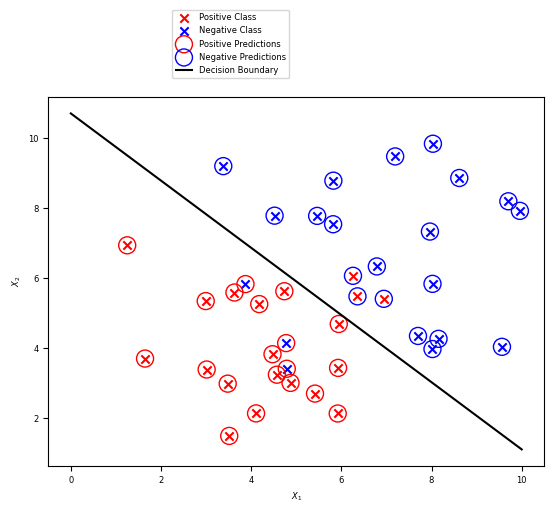

In [105]:
theta_1 = exemplo_lr.coef_[0][0]
theta_2 = exemplo_lr.coef_[0][1]


theta_0 = exemplo_lr.intercept_

X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2) * X_1_decision_boundary - (theta_0/theta_2)

pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive Class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative Class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors='none', label='Positive Predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none', label='Negative Predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision Boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])

### Ajustando o modelo de regressão logística e usando os coeficientes diretamente


In [110]:
X_train, X_test, y_train, y_test = train_test_split(df5[['PAY_1', 'LIMIT_BAL']].values, df5['default payment next month'].values, test_size=0.2, random_state=24)
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)
ones_and_features = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
intercept_and_coefs = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))
y_pred_proba_manual = sigmoid(X_lin_comb)
y_pred_manual = y_pred_proba_manual >= 0.5
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)


True

In [111]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

np.float64(0.627207450280691)

In [112]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.627207450280691)

1. Confirmamos que tudo que precisamos nesse modelo ajustado do scikit-learn são três números: a interceptação e os dois coeficientes. 
2. Uma vez que o temos, podemos criar previsões do modelo usando algumas linhas de código, com funções matemáticas que sejam equivalentes às previsões feitas pelo scikit-learn.
3. Isso é útil, pois se você não tiver acesso ao Python, você pode fazer as previsões em SQL, só copiando os três numeros. 

### Separando as secções

In [119]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.79100646, 0.20899354],
       [0.79100646, 0.20899354],
       [0.79100646, 0.20899354],
       ...,
       [0.79100646, 0.20899354],
       [0.75494963, 0.24505037],
       [0.79100646, 0.20899354]])

Text(0, 0.5, 'Number of samples')

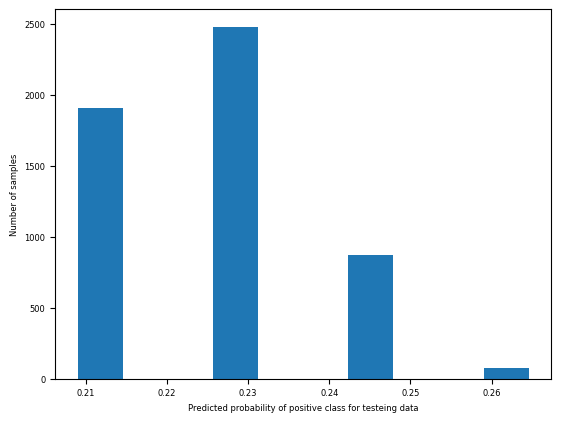

In [120]:
pos_proba = y_pred_proba[:, 1]
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testeing data')
plt.ylabel('Number of samples')


1. Há apenas 4 bins pois a carcaterística EDUCATION possui 4 valores.
2. Todas as amostras estão abaixo do thershold padrão (0.5).
3. Podemos mover nosso Limite para abaixo de 0.25 e ver se o modelo melhora.
4. Vamos fazer isso usando um histograma empilhado.

Text(0, 0.5, 'Number of samples')

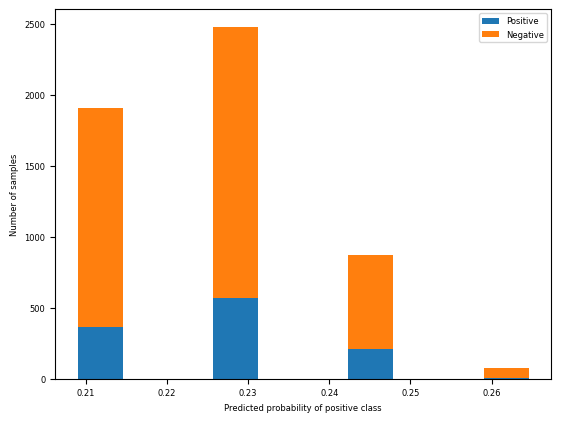

In [121]:
# Isolando a probabilidade de previsão positiva (1) e negativa (0)
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive', 'Negative'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')


1. Já que todas as amostras do bin menor da direita são negativas, se diminuíssemos o limite para 0.25, elas seriam classificadas erroneamente como amostras positivas e aumentaríamos nossa taxa de falsos positivos. 
2. Ao mesmo tempo, ainda não teríamos conseguido classificar muitas amostras positivas corretamente, caso conseguíssemos classificar alguma, logo, a taxa de verdadeiros positivos aumentaria demais. 
3. Parece que fazer essa alteração diminui a acurácia do modelo.

## 5.3 - Curva ROC

* A definição de um limite para o classificador depende de encontrarmos um ponto de equilibrio no qual possamos recuperar com sucesso verdadeiros positivos suficientes sem gerar excesso de falsos positivos. 
* Um bom classificador consegue capturar mais verdadeiros positivos sem gerar um número maior de falsos positivos. 
* A cruva ROC é uma plotagem das partes de taxas de verdadeiros positivos (eixo y) e falsos positivos (eixo x) que resulta da diminuição do limite de 1 até 0. 
* A medida que o limite for diminuíndo a TRP começará a crescer, esperamso que mais rapidamente do que a FPR se tivermos um bom classificador.
* A aparência de uma curva ROC desejável é: a medida que aumentarmos o LIMITE, queremos ver a TPR aumentar, indicando que nosso classificador está fazendo um bom trabalho de identificar corretamente amostras positivas. Ao mesmo tempo, idealmente a FPR não deve aumentar tanto (alta taxa de verdadeiros positivos e baixa taxa de falsos positivos) TRP = 1 e FPR = 0. É altamente improvável.
* A AUC (área under curve) de um classificador perfeito seria 1, porque a forma da curva seria um quadrado sobre o intervalo de unidades [0,1].
* A ROC AUC é uma métrica-chave para a avaliação da qualidade de um classificadore é amplamente usada em M.L. Ela também é chamada de estatística-C. 

array([       inf, 0.26458362, 0.24505037, 0.22651502, 0.20899354])

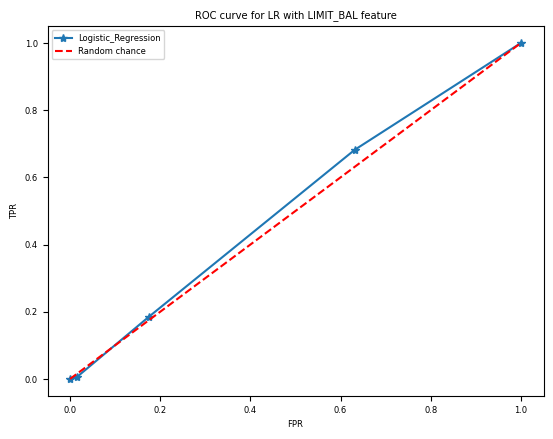

In [122]:
fpr, tpr, thershold = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic_Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for LR with LIMIT_BAL feature')
thershold

In [123]:
metrics.roc_auc_score(y_test, pos_proba)

np.float64(0.52319772578449)

1. A ROC AUC da regressão logística chega perto de 0.5 o que singifica que ela não é um classificador muito eficaz. 
2. Isso não é uma surpresa, considerando que não tivemos trabalho para determinar que carcaterísticas do pool de candidatas são realmente úteis nesse momento. 
3. Posteriormente, ao considerar outras carcaterísticas, esperamos obter uma ROC AUC mais alta.

1. Sobre a feature LIMIT_BAL, percebe-se que a roc/auc é maior do que a feature EDUCATION.
2. Isso pode estar ocorrendo porque agora estamos usando uma característica que tem algo a ver com o status financeiro da conta (limite de crédito) para prever outra coisa relacionada ao status financeiro, em vez de utilizar algo menos relacionado a finanças.
3. Isso parece mais com a curva ROC que gostaríamos de ver: está mais distânte da chance aleatória e a variação nos pares de taxas de verdadeiros e falsos positivos é um pouco mais suave no intervalo de limites.

In [124]:
# dividindo os dados em treinamento e teste para característica LIMIT_BAL
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df5['LIMIT_BAL'].values.reshape(-1,1), df5['default payment next month'].values, test_size=0.2, random_state=24)

# treinando o modelo para característica LIMIT_BAL
example_lr.fit(X_train_2, y_train_2)

/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [125]:
# criando o array de probabilidades previstas para os dados de test
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [126]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:, 1])

np.float64(0.6201990844642832)

array([       inf, 0.26458362, 0.24505037, 0.22651502, 0.20899354])

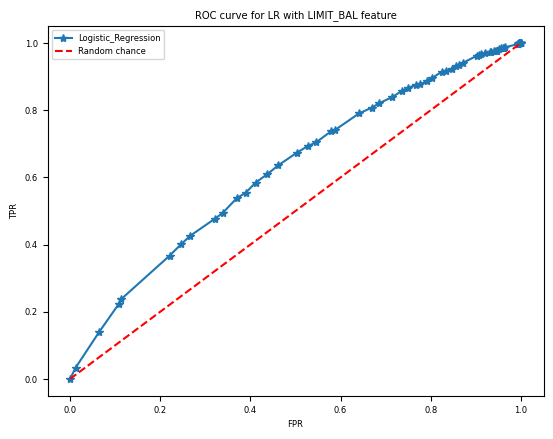

In [127]:
fpr_2, tpr_2, thershold_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:, 1])
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic_Regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for LR with LIMIT_BAL feature')
thershold

(0.0, 1.0)

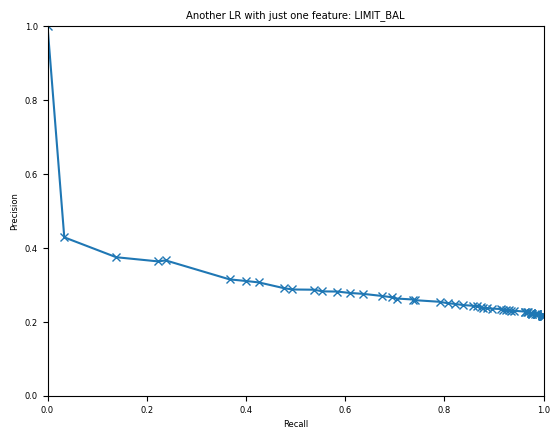

In [128]:
precision, recall, threshold_2 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:, 1])
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Another LR with just one feature: LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])

In [129]:
metrics.auc(recall, precision)

np.float64(0.31566964427378624)

In [130]:
# Calculando a ROC AUC sobre os dados de treinamento
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:, 1])

np.float64(0.6182918113358344)

1. A precisão é bastante baixa para esta característica.
2. Quantitativamente, a AUC dos dados de treinamento não é tão diferente da ROC AUC dos dados de teste. Quando calculamos essa métrica com os dados de treinamento, estamos medindo a habilidade do modelo prever os mesmos dados que o ensinaram como fazer previsões. Estamos vendo com que eficácia o modelo se ajsuta aos dados. Isso serve para medir se o modelo está ou não generalizando bem.

# 6.0 - Gerando Dados Aleatórios - Para Regressão Linear

In [ ]:
# Gerando variável de carcaterísticas aleatória
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

In [ ]:
# Gerando variável resposta aleatória e linear, com ruído distribuído pela normal (gauss)
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept
plt.scatter(X, y, s=1)

In [ ]:
# Determinando linha de melhor ajuste
# Trienando o Modelo
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

In [ ]:
# Previsão
y_predc = lin_reg.predict(X.reshape(-1,1))

plt.scatter(X, y, s=1)
plt.plot(X, y_predc, 'r', color='red')

1. Aqui, ao contrário do .predict() da Regressão Logística, fizemos previsões para os mesmos dados X que usamos para treinar o modelo. 
2. Assim, enquanto no caso atual estamos vendo como o modelo se "ajusta" os mesmos dados com os quais foi treinado, anteriormente examinamos previsões do modelo para dados novos.
3. Em M.L., geralmente o que nos interessa são os recursos preditivos para dados novos. No entanto, as previsões tanto dos dados de treinamento usados para ajustar o modelo, quanto dos dados de teste, que não foram usados no ajuste, são importantes para entendermos o funcionamento do modelo.

# 7.0 - Métricas de Desempenho de modelos para classificação binária

* Perguntas a serem repsondidas: (www.scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)
  1. A métrica é conveniente para o problema?
  2. O modelo performa "bem" para o problema de negócio em questão? (a métrica responde à pergunta da empresa?)
    2.1 - Em um contexto empresarial, as metas típicas são gerar lucro ou reduzir perdas. 
    2.2 - Há um custo mais alto associado à não identificação correta das contas que ficarão inadimplentes? Ou é mais importante identificar corretamente as contas que não estarão inadimplentes?

1. Para problemas de classificação binária, várias métricas podem representar a precisão da pergunta resposta (a nível de detalhe, com que frequencia o modelo está correto para cada classe)
2. As métricas de regressão, visam medir o quanto uma previsão se aproximou do valor alvo. O modelo está subestimando ou superestimando?

* Precisão (valor preditivo positivo): examina a proporção de verdadeiros positivos em relação 1a soma de verdadeiros e falsos positivos. Em outras palavras, ela mede a proporção de previsões positivas que estão corretas entre todas as previsões positivas. 
* Geralmente a precisão é usada quando as classes estão muito desbalanceadas e se preocupa mais com a obtenção de um bom desempenho do modelo referente à exatidão das previsões positivas. É fácil obter uma alta taxa de verdadeiros positivos quando prevermos muitas amostras como positivas, mas isso também aumenta os falsdos positivos. 
* Se houver muito poucas amostras positivas, a precisão fornecerá uma avaliação mais crítica da qualidade de um classificador do que a ROC AUC. 
* Por que a precisão pode ser uma medida útil de desempenho do classificador? 
  1. Ela minimiza os custos de falsos positivos: a precisõa é especialmente útil em situações onde os custos de falsos positivos são altos. Por exemplo, em sistema de detecção de fraudes, um falso positivo pode resultar em ações injustas contra um cliente legítimo. A alta precisão garante que, quando o modelo prevê um positivo, há uma alta confiança de que ele realmente é positivo. 
  2. Importância em classes Desbalanceadas: em problemas onde as classes estão desbalanceadas, a precisão pode fornecer uma visão mais detalahada do desempenho do modelo em relação à classe posivita. Por exemplo, a precisão é crucial para garantir que as previsões positivas sejam realmente relevantes. 
  3. Aplicação em sistemas de recomendação e pesquisa: em sistemas onde o objetivo é apresentar ao usuário apenas os itens mais relevantes, a precisão ajuda a garantir que o conteúdo apresentado seja altamente relevante para a consulta ou preferência do usuário. 
* Em problemas onde é importante capturar o máximo de positivos possíveis (como diagnósticos médicos), é importante também considerar o recall e outras métricas como o F1-Score que combina precisão e recall.

--- RESUMO ---
1. A acurácia, embora seja uma métrica familiar a intuitiva, ela não é uma boa métrica para dados desbalanceados. 
2. Para se ter uma visão mais nunançada de como o modelo está se saindo, é necessário separar as classes positivas e negativas e avalair sua acurácia independentemente. 

# 8.0 - Engenharia de Características

In [131]:
# selecionando as características no dataframe
features = features_response[:-1]
X = df5[features].values

In [132]:
# criando uma divisão de treinamento/teste usando um seed aleatório igual a 24
X_train, X_test, y_train, y_test = train_test_split(X, df5['default payment next month'].values, test_size=0.2, random_state=24)

In [133]:
# instanciando MinMaxScaler
min_max_sc = MinMaxScaler()

# instanciando o modelo de RL com solver saga
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [134]:
# improtando a classe Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [135]:
# usando os métodos get_params e set_params para alterar os parâmetros do modelo
scale_lr_pipeline.get_params()
scale_lr_pipeline.get_params()['model__C']
scale_lr_pipeline.set_params(model__C = 2)

C_val_exponents = np.linspace(2, -3, 6)
C_vals = 10 ** C_val_exponents  # Eleva 10 aos valores gerados

In [136]:
# criando função cross_val_C_search
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [137]:
kf = KFold(n_splits=6) 
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(kf, C_vals, scale_lr_pipeline, X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation on Case Study problem')

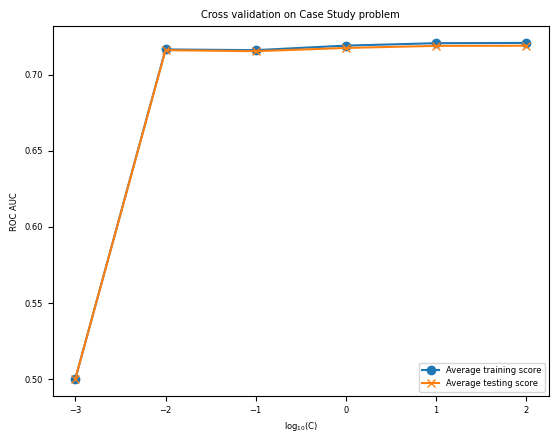

In [117]:
# plotando a curva ROC AUC
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

1. As pontuações de treino e teste são quase iguais, o que indica que a regularização não apresenta muitos benefícios.
2. Parece que não há ocorrência de Overfitting.
3. É possível que esteja ocorrendo Underfitting.
4. Criaremos algumas features através da engenharia para ver se ela consegue melhorar o modelo.

In [118]:
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = make_interactions.fit_transform(X)

In [119]:
X_interact.shape

(26664, 171)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_interact, df5['default payment next month'].values,test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)

(21331, 171)
(5333, 171)


In [121]:
# instanciando MinMaxScaler
min_max_sc = MinMaxScaler()

# instanciando o modelo de RL com solver saga
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=100)

In [122]:
# improtando a classe Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [123]:
# usando os métodos get_params e set_params para alterar os parâmetros do modelo
scale_lr_pipeline.get_params()
scale_lr_pipeline.get_params()['model__C']
scale_lr_pipeline.set_params(model__C = 2)

C_val_exponents = np.linspace(2, -3, 6)
C_vals = 10 ** C_val_exponents  # Eleva 10 aos valores gerados

In [124]:
# aplicando a validação cruzada nas características estabelecidas pela engenharia
kf = KFold(n_splits=6) 
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(kf, C_vals, scale_lr_pipeline, X_train, y_train)

/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarni

Done with C = 100.0


/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarni

Done with C = 10.0


/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarni

Done with C = 1.0


/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/emersds/.pyenv/versions/3.12.3/envs/credit_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation on Case Study problem')

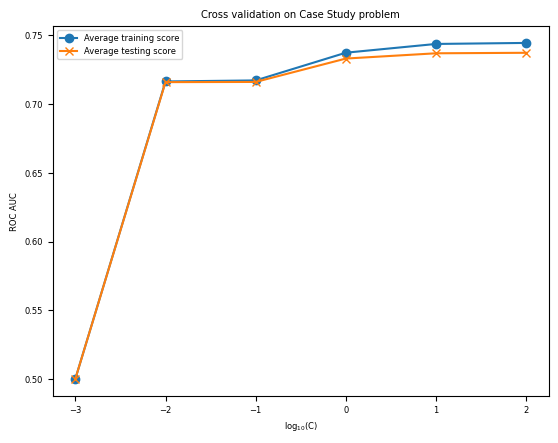

In [125]:
# plotando a curva ROC AUC
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [126]:
np.mean(cv_test_roc_auc, axis=0)

array([0.73733869, 0.73697803, 0.73314585, 0.71612664, 0.71598663,
       0.5       ])

1. A criação de características de interação por engenharia aumenta a melhor pontuação de teste do modelo para uma ROC AUC = 0.74 na média entre os folds, que sem a inclusão das interações era de 0.72.
2. Essas pontuações ocorrem em C=100, isto é, com uma regularização insignificante. 
3. Apesar de nos dados de treinamento a pontuação ser um pouco mais alta que a de teste, este não parece ser um caso problematico de overfitting.
4. Não podemos aumentar a pontuação de teste pela regularização aqui. Quase sempre a estrategia que produz a pontuação de teste mais alta é a melhor. 